<a href="https://colab.research.google.com/github/jmatt724/Individual_Project_1/blob/main/IndividualProject1_JLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Project 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_data.csv")

In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


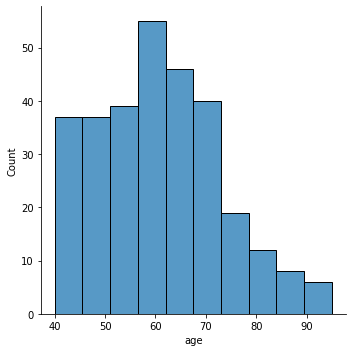

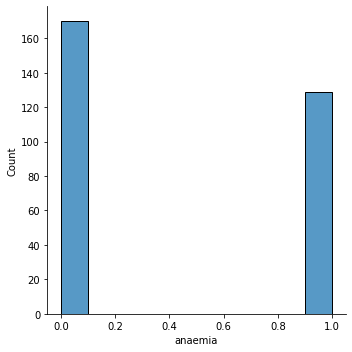

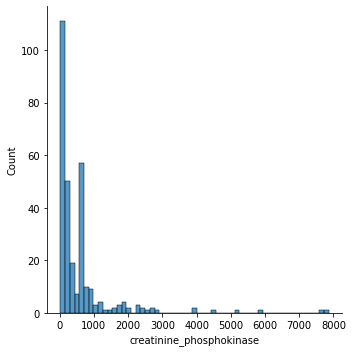

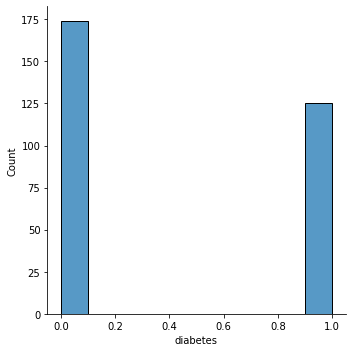

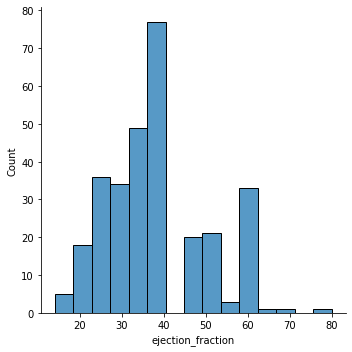

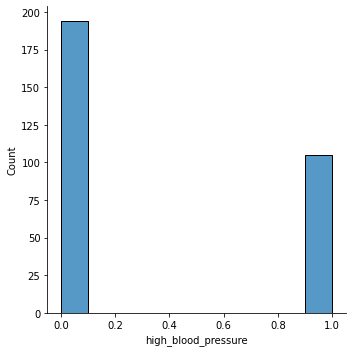

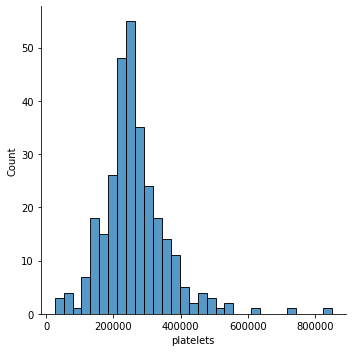

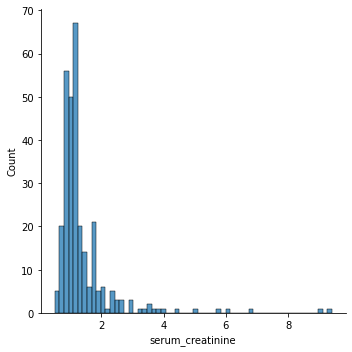

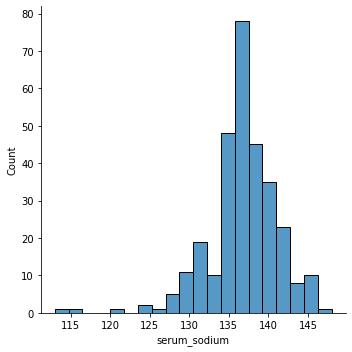

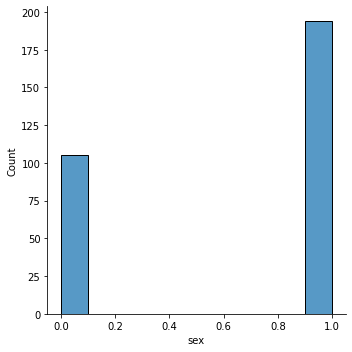

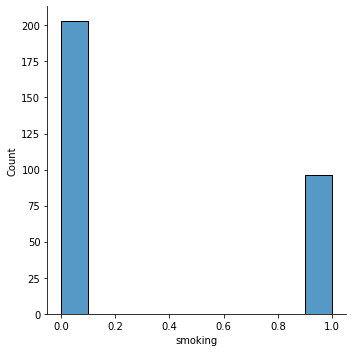

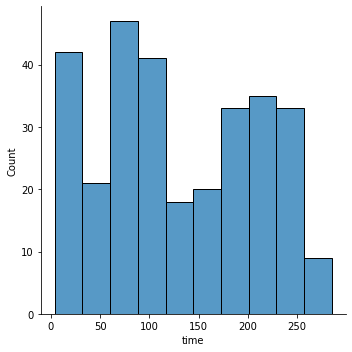

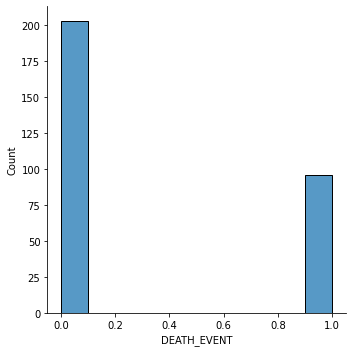

In [ ]:
import seaborn as sns

for col in dataset:
  sns.displot(dataset[col])

In [ ]:
corr = dataset.corr()
print(corr)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

In [ ]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Explanation of the columns

*   Age
*   Anaemia - a condition that develops when your blood produces a lower-than-normal amount of healthy red blood cells
*   Creatinine_phosphokinase - is an enzyme in the body. It is found mainly in the heart
*   Diabetes - condition that increases chance of heart failure
*   Ejection_fraction - a measurement of the percentage of blood leaving your heart each time it squeezes
*   high_blood_pressure - is defined as a systolic pressure 120 to 129, and a diastolic pressure less than 80
*   platelets - the smallest of our blood cells
*   serum_creatinine - based on a blood test that measures the amount of creatinine in your blood
*   serum_sodium - a way for your health care provider to measure the amount of sodium in your blood
*   sex - M/F
*   smoking - if the patient is a smoker
*   time - follow up period in days
*   DEATH_EVENT - target (if the person died as a result)



In [ ]:
X = dataset.drop('DEATH_EVENT', axis = 1)
y = dataset['DEATH_EVENT']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### No imputation needed

## Splitting the **Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Scaling the dataset using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

Sc_x = StandardScaler()

X_train = Sc_x.fit_transform(X_train)
X_test = Sc_x.transform(X_test)

## We will use the Voting Classifier to create our model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### We will use Logistic Regression, Random Forest, SVC, and DT(gini and entropy) in our Voting Classifier

In [ ]:
log_clf = LogisticRegression(solver = 'lbfgs', 
                             multi_class='multinomial', 
                             max_iter = 100)
rnd_clf = RandomForestClassifier()

svm_clf = SVC(gamma='auto', probability = True)

clf_gini = DecisionTreeClassifier(criterion='gini', 
                                  max_depth = 5,
                                  random_state = 0)
clf_ent = DecisionTreeClassifier(criterion = 'entropy',
                                 max_depth=5,
                                 random_state=0)

### Setting up our Voting Classifier with estimators

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf),
        ('gini', clf_gini),
        ('entropy', clf_ent)],
    voting='soft')

### Training the model

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('gini',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=0)),
                             ('entropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=0))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, clf_gini, clf_ent):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8166666666666667
RandomForestClassifier 0.8333333333333334
SVC 0.7666666666666667
VotingClassifier 0.7666666666666667
DecisionTreeClassifier 0.6833333333333333
DecisionTreeClassifier 0.7166666666666667


In [ ]:
y_pred_voting = voting_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_voting))

[[36  5]
 [ 9 10]]


In [ ]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.67      0.53      0.59        19

    accuracy                           0.77        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.76      0.77      0.76        60



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred_voting))
print(r2_score(y_test, y_pred_voting))

0.23333333333333334
-0.07830551989730439
